In [3]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import konlpy
from konlpy.tag import Okt
from collections import Counter
import konlpy.tag
import pandas as pd

def get_news():
    client_id = "OKQPTGKiQf0V3yitzK6o"
    client_secret = "uIGSvzveCB"


    keyword = input('뉴스 검색어를 입력해주세요')

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/news?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
            # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                print(response_body.decode('utf-8'))
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)

                jdata['items']

                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)

    f = open('{0} - 네이버API 뉴스검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
            f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    return result

In [4]:
def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()

def get_text(data):
    result_text = ''
    for temp in data:
        result_text = result_text +' ' +  temp[2]

    return result_text


def Wordcloud(data , savename , maskname=''):
    noun_text = ''
    for word in data:
        noun_text = noun_text +' ' + word
    
    if maskname == '':
        wc = WordCloud( font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='BuGn_r').generate(noun_text)
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='BuGn_r').generate(noun_text)
        
#     wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file('../data/크롤링/savename' + '.png')


In [5]:
bdata = get_news()
rtext = get_text(bdata)

뉴스 검색어를 입력해주세요어린이보호구역
{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:25 +0900",
"total": 104964,
"start": 1,
"display": 100,
"items": [
{
"title": "<b>어린이보호구역</b> 단속카메라 절반은 '먹통'…경찰·지자체 '방치'",
"originallink": "https://www.news1.kr/articles/?4451319",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=421&aid=0005636402",
"description": "<b>어린이보호구역</b>의 교통사고 예방을 위한 이른바 '민식이법' 시행 이후 스쿨존 내에 과속단속카메라 설치는 크게 늘었지만 상당수가 무용지물인 것으로 나타났다. 4일 국회 행정안전위원회 소속 이형석 더불어민주당... ",
"pubDate": "Mon, 04 Oct 2021 16:27:00 +0900"

},
{
"title": "<b>어린이 보호구역</b>서 아이 들이받은 역주행 오토바이…누리꾼들 &quot;운전자 입장도...",
"originallink": "https://view.asiae.co.kr/article/2021100315594169352",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004977787",
"description": "아이들도 항상 주위를 잘 살피고 안전할 때 건너야 한다는 걸 부모들이 잘 교육할 필요성이 있는 영상&quot;, &quot;민식이법 논하기 전에 <b>어린이보호구역</b> 내 불법주차 차량을 강력단속하는 것이 먼저다. 불법을 저지르고 있는 차들을... ",
"pubDate": "Sun, 03 Oct 2021 15:57:00 +0900"

},
{
"title": "<

{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:25 +0900",
"total": 104964,
"start": 101,
"display": 100,
"items": [
{
"title": "여수시, 안전속도 5030 &quot;<b>어린이</b> 안전 우리가 지켜요&quot;",
"originallink": "http://www.enewstoday.co.kr/news/articleView.html?idxno=1515062",
"link": "http://www.enewstoday.co.kr/news/articleView.html?idxno=1515062",
"description": "전남 여수시는 지난 28일 미평초등학교 일대 <b>어린이 보호구역</b>에서 '안전속도 5030' 및 '속도를 줄이면 <b>어린이</b>가 보입니다'를 주제로 교통안전 캠페인을 진행했다. 여수시가 지난 28일 미평초등학교 일대 <b>어린이</b>... ",
"pubDate": "Wed, 29 Sep 2021 10:40:00 +0900"

},
{
"title": "제주경찰청, <b>어린이</b> 교통안전 지도제작 공모전",
"originallink": "http://www.headlinejeju.co.kr/news/articleView.html?idxno=463606",
"link": "http://www.headlinejeju.co.kr/news/articleView.html?idxno=463606",
"description": "한편, 올해 제주에서 <b>어린이보호구역</b> 내 교통사고는 지난해에 비해 50% 감소했으나 속도위반은 매년 증가하고 있는 것으로 나타났다. 경찰에 따르면 지난해 1월부터 8월까지 도내 <b>어린이보호구역</b>에서 발생한... ",
"pubDate": "Tue, 28 Sep 2021 10:46:00 +0900"

},
{
"title": "&quot;영주 <b>어린이</b> 등하굣길, 우리가 지킨다&quot;",
"

{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:26 +0900",
"total": 104964,
"start": 301,
"display": 100,
"items": [
{
"title": "여수시, <b>어린이보호구역</b> 안전사고 예방 ‘총력’",
"originallink": "http://www.boannews.com/media/view.asp?idx=100517&kind=",
"link": "http://www.boannews.com/media/view.asp?idx=100517&kind=",
"description": "<b>어린이보호구역</b> 22개소에 무인교통단속장비 22대 설치[보안뉴스 ] 여수시가 <b>어린이</b>들의 안전한 등·하굣길을 위해 <b>어린이보호구역</b> 교통안전시설물 확충에 박차를 가하고 있다.시는 올해 국비 확보 등 약 14억원의... ",
"pubDate": "Wed, 08 Sep 2021 10:52:00 +0900"

},
{
"title": "'<b>어린이보호구역</b>'에서 차량 5대가 모두 신호를 위반하는 장면 (영상)",
"originallink": "https://www.wikitree.co.kr/articles/689885",
"link": "https://www.wikitree.co.kr/articles/689885",
"description": "<b>어린이보호구역</b>에서 정지 신호를 무시하고 직진하는 차들을 모두 신고했다는 사연이 알려졌다. 15일 커뮤니티 보배드림에 '10초 만에 65만 원 후기'라는 제목으로 올라온 글이 누리꾼들의 이목을 끌고 있다. 글쓴이는... ",
"pubDate": "Thu, 16 Sep 2021 14:30:00 +0900"

},
{
"title": "<b>어린이 보호구역</b> 점검하는 최관호 서울경찰청장",
"originallink": "http://www.newsis.com/view/?id=NISI20210906_0017920030",

{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:26 +0900",
"total": 104964,
"start": 501,
"display": 100,
"items": [
{
"title": "도시숲 조성해 탄소중립 대응… 충북도, 2022년 238억 예산 투입",
"originallink": "http://www.segye.com/content/html/2021/10/03/20211003507978.html?OutUrl=naver",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003624930",
"description": "자녀안심그린숲은 초등학교 인근 <b>어린이보호구역</b>에 인도와 차도를 분리한다. 숲이 녹색 공간을 제공하고 안전도 확보하는 기능을 한다. 충북도는 도심 속 자투리땅이나 유휴지에 조성하는 녹색쌈지숲과 녹색 교육장인... ",
"pubDate": "Mon, 04 Oct 2021 02:03:00 +0900"

},
{
"title": "&quot;학교 안&quot; vs &quot;학교 밖&quot; 세종 도심 통학차량 승하차<b>구역</b> 놓고 '씨름'",
"originallink": "https://www.cctoday.co.kr/news/articleView.html?idxno=2148974",
"link": "https://www.cctoday.co.kr/news/articleView.html?idxno=2148974",
"description": "문제는 10월부터 도로교통법 개정에 따라 <b>어린이 보호구역</b> 내에서는 원칙적으로 모든 차량의 주정차가 금지된다는 점. <b>어린이</b>가 통학용 차량에 승하차하기 위한 경우는 <b>구역</b>·시간·방법 및 차의 종류를 정해 일정한... ",
"pubDate": "Mon, 06 Sep 2021 20:00:00 +0900"

},
{
"

{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:27 +0900",
"total": 104964,
"start": 601,
"display": 100,
"items": [
{
"title": "대구시, <b>어린이 보호구역</b> 내 무인교통단속장비 확대",
"originallink": "http://www.newsway.co.kr/news/view?tp=1&ud=2021082717340585847",
"link": "http://www.newsway.co.kr/news/view?tp=1&ud=2021082717340585847",
"description": "대구시는 내년까지 <b>어린이 보호구역</b> 보행 안전 확보를 위해 무인교통단속장비 264대를 추가 설치한다. 2019년 12월 도로교통법 개정으로 <b>어린이 보호구역</b>에 무인교통단속장비를 우선 설치해야 됨에 따라 대구시는... ",
"pubDate": "Fri, 27 Aug 2021 17:36:00 +0900"

},
{
"title": "대형건설사 공사현장으로 위험지역 된 '<b>어린이보호구역</b>'",
"originallink": "http://news.tf.co.kr/read/national/1884402.htm",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=629&aid=0000102897",
"description": "26일 오후 12시경 대형 건설사인 S건설이 대구 수성구 공사현장 정문 앞을 가로지르는 <b>어린이보호구역</b>에는 불법주차 차량이 줄지어 서 있었다. 이 <b>어린이보호구역</b>은 폭 6m로 유치원 2곳과 중고등학교의 등교길로 학생들이... ",
"pubDate": "Fri, 27 Aug 2021 15:23:00 +0900"

},
{
"title": "함덕초병설유치원, <b>어린이보호구역</b> 교통안전교육 실시",
"originalli

{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:27 +0900",
"total": 104964,
"start": 701,
"display": 100,
"items": [
{
"title": "북부자치경찰위 '<b>어린이 보호구역</b> 주ㆍ정차 전면금지' 시행 따른 대책 마련 지...",
"originallink": "http://www.kmaeil.com/news/articleView.html?idxno=298076",
"link": "http://www.kmaeil.com/news/articleView.html?idxno=298076",
"description": "경기도북부자치경찰위원회는 12일 제6회 임시회의를 열고 경기도북부경찰청에 <b>어린이 보호구역</b> 주·정차 전면금지 시행에 따른 대책마련을 하도록 심의·의결했다. (사진=경기도북부자치경찰위원회)... ",
"pubDate": "Thu, 12 Aug 2021 17:26:00 +0900"

},
{
"title": "경기도북부자치경찰위원회, <b>어린이 보호구역</b> 주·정차 전면금지 시행 대책 마...",
"originallink": "http://www.kihoilbo.co.kr/news/articleView.html?idxno=941438",
"link": "http://www.kihoilbo.co.kr/news/articleView.html?idxno=941438",
"description": "기호일보 - 아침을 여는 신문, KIHOILBO 경기도북부자치경찰위원회(자치위원회)가 <b>어린이 보호구역</b> 주·정차 전면금지 시행에 따른 대책을 마련하도록 심의·의결했다. 자치위원회는 12일 경기도북부경찰청에서 '제6회... ",
"pubDate": "Thu, 12 Aug 2021 19:32:00 +0900"

},
{
"title": "경기도 북부자치경찰위 '<b>어린이 보호구역</b> 주ㆍ정차 전면금지' 시행 따른 대책...",
"originallink"

{
"lastBuildDate": "Mon, 04 Oct 2021 23:47:27 +0900",
"total": 104964,
"start": 901,
"display": 100,
"items": [
{
"title": "화물차 불법 판스프링, <b>어린이보호구역</b> 울타리로 재탄생",
"originallink": "http://www.newsis.com/view/?id=NISX20210801_0001533803&cID=10401&pID=10400",
"link": "https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010641507",
"description": "한국교통안전공단은 오는 3일부터 국토교통부, 경찰청, 서울시, 현대자동차와 공동으로 '화물차 불법 판스프링 제거 및 <b>어린이 보호구역</b> 안전 울타리 설치 캠페인'을 펼친다고 2일 밝혔다. 이번 캠페인은 불법... ",
"pubDate": "Mon, 02 Aug 2021 06:00:00 +0900"

},
{
"title": "한국교통안전공단-국토교통부, '화물차 불법 판스프링 제거 및 <b>어린이 보호</b>구...",
"originallink": "http://www.econonews.co.kr/news/articleView.html?idxno=210803",
"link": "http://www.econonews.co.kr/news/articleView.html?idxno=210803",
"description": " 한국교통안전공단은 오는 3일부터 국토교통부, 경찰청, 서울시, 현대자동차와 공동으로 '화물차 불법 판스프링 제거 및 <b>어린이 보호구역</b> 안전 울타리 설치 캠페인'을 펼친다고 2일 밝혔다. 공단에 따르면 이번 캠페인은... ",
"pubDate": "Mon, 02 Aug 2021 11:50:00 +0900"

},
{
"title": "광양시, <b>어린이보호구역</b> 불법

In [6]:
#부정어사전 추가
n = pd.read_csv('../data/크롤링/사전/neg_pol_word.csv',sep='\n')
nag = []
for i in n['0']:
    nag.append(i)

In [7]:
#긍정어사전 추가
p = pd.read_csv('../data/크롤링/사전/pos_pol_word.csv',sep='\n')
pos = []
for i in p['0']:
    pos.append(i)

#불용리스트 만들기
stopwords = ['보호','스쿨존','구역','노인','어린이','등','교통','곳','지정','안전','사업','일','시설','위해','및','년','장애인','위','경로당','설치','주변',
            '교통사고','보행자','보행','환경','도로','시','유치원','이번','중','조례','복지','차량','올해','애인','개','개소','억','관내',
            '의원','전국','발생','추가','이','물','월','원','확대','내','현재','광주','리','지역','최근','대전','것','지난해','초등학교','관','인구',
            '존','완료','대한','투입','공단','기자','대해','지난','마을','로','수','총','시행','조성','추진','공원','경찰정','경찰','충남',
            '회','또','군','신규','계획','안','광주시','시스템','생활','활동','중구','어르신','윤','실버','서울시회관','경우','통행','기준','어린이집',
            '진행','구','경기도','만','윤','복지관','아산시','대책','기관','인근','행사','점검','부과','지원','대폭','도시','억원','횡단보도','전통','도',
            '서울시','시장','회관','운영','가운데','민주당','공사','제조','요양원','개정','이상','규칙','고','지자체','앞','억만원','운전',
            '자동차','릴레이','광양시','주차장','린지','인천','위원회','사진','행정안전부','도로교통법','확보','우산','정착','캠페인','무인','주민',
            '보험','울타리','문화','전남','청장','를','우선','체결','확산','주민','무인','경찰청','초록','현대차','충북','국비','통해','합동대선',
            '사고','교체','내용','경기','최','한국','대표','나눔','건','계층','폐지','자녀','봉사','자치','달','스프링','시작',
            '국토교통부','제공','건','대구','손해','본부장','어린이재단','판','숲','서울특별시','협약','국민']

#불용어사전 추가
for i in stopwords:
    pos.append(i)

In [8]:
#분리
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    words = dict(count.most_common(ntags))
    
    #불용어 사전안에 있으면 삭제
    for i in pos:
        if i in words:
            del words[i]
    return words

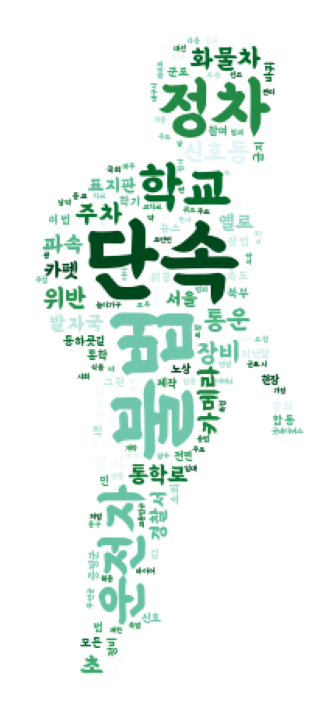

In [10]:
rtags = get_tags(rtext, ntags=400)
# print(rtags)

Wordcloud(rtags, '어린이보호구역','../data/WordCloud/mask/mask_ss.png')
